Dataset code is decoupled from our Model training code for better readability and modularity

Data loader -> wraps an iterable around the datasets to enable easy access to the samples

We load a FashinMNIST Datasets witht the following parameters:
* root: Is the path where the train/test data is stored
* train: spcifies training or test datasets
* download = True : downloads the data from the internet if it's not available at root
* transform and target_transform: specify the feature and label transformations




In [2]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [4]:
training_data = datasets.FashionMNIST(
    root = "data",
    train = True,
    download = True,
    transform= ToTensor()
)


test_data = datasets.FashionMNIST(
    root ="data",
    train= False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26.4M/26.4M [00:01<00:00, 21.9MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 334kB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 6.35MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 12.8MB/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [5]:
training_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [7]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

60,000 training examples and 10,000 test examples.

# Iterating and Visualizing the Datasets

we can index Datasets manually like a list training_data[index]

In [9]:
labels_map  = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

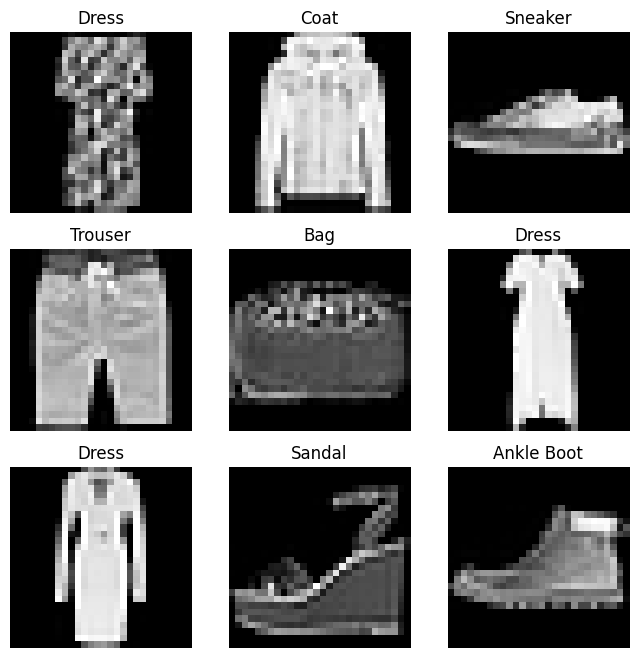

In [14]:
figure  = plt.figure(figsize=(8,8))
cols, rows = 3, 3
for i in range(1, cols* rows + 1 ):
  # drwas the grid
  sample_idx = torch.randint(len(training_data), size=(1,)).item()
  img, label = training_data[sample_idx]
  figure.add_subplot(rows, cols, i)
  # fills the grid with images
  plt.title(labels_map[label])
  plt.axis("off")
  plt.imshow(img.squeeze(), cmap="gray")
plt.show()

# Creating a Custom Dataset for your files

A custom dataset class must implement three functions: __init__, __len__, and __getitem__.

Images are stored in the directory img_dir
Labels are stored in the csv annotations_file

In [17]:
import os
import pandas as pd
from torchvision.io import read_image

In [18]:
class CustomImageDataset(Dataset): # instanciates the Dataset object, Initialize the directory containing images, annotation files, and both transforms
  def __init__(self, annotation_files, img_dir, transform=None, target_transform=None):
    self.img_labels = pd.read_csv(annotation_files)
    self.img_dir = img_dir
    self.transfrom= transform
    self.target_transform= target_transform

  def __len__(self): # returns the number of samples in the dataset
    return len(self.img_labels)

  def __getitem__(self, idx):
    img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0]) # full path of image from the first column
    image = read_image(img_path) # converts the image to a tensor
    labels = self.img_labels.iloc[idx, 1] #get corresponding label from second columns in the csv dataset
    if self.tranfrom: #apply image and label transfroms if provided
      image = self.tranfrom(image)
    if self.target_transform:
      labels = self.target_transform(labels)
    return image, labels #returns a tuple of the tensor image and corresponding label


## How to use it

In [ ]:

dataset = CustomImageDataset(
    annotation_files='labels.csv',
    img_dir='images/',
    transform=transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor()])
)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Preparing your data for training with Dataloaders

Dataset retrieves dataset features and labels one sample at a time. While training a model, we typically want to pass samples in minibatches, resuffle the data at every epoch to reduce model overfitting, and use python multiprocessing to speed up data retrival

In [20]:
from torch.utils.data import DataLoader

# Loading the dataset into the dataloader

train_dataloader = DataLoader(training_data, batch_size= 64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True )

Each iteration inside the dataloader returns a batch of training_features and train_labels, Since shuffle= True after we iterate over all batches the data is shuffled.

# Iterate throught the DataLoader

In [24]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


In [26]:
train_labels

tensor([1, 4, 6, 8, 1, 6, 9, 3, 7, 5, 4, 7, 3, 9, 2, 3, 8, 5, 5, 8, 7, 5, 0, 9,
        5, 9, 9, 8, 0, 9, 2, 8, 7, 9, 3, 4, 8, 3, 2, 2, 6, 4, 0, 0, 0, 5, 6, 3,
        3, 9, 8, 3, 8, 1, 1, 4, 2, 2, 5, 3, 6, 6, 3, 4])

In [30]:
train_features[0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.1765, 0.7098, 0.6157, 0.4627, 0.4000, 0.6706,
          0.5412, 0.5020, 0.1294, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.4314, 0.9373, 0.7843, 0.7843, 0.8902, 0.9255,
          0.5843, 0.4667, 0.2902, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.6392, 0.7216, 0.7176, 0.7922, 0.8353, 0.6588,
          0.5333, 0.4549, 0.4824, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0784, 0.9255, 0.7373, 0.7843, 0.7725, 0.4510, 0.6588,
          0.6392, 0.6549, 0.6000, 0.0275, 0.0000, 0.0000,

In [42]:
img = train_features[0].squeeze()
label = train_labels[0]

In [43]:
img

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.1765, 0.7098, 0.6157, 0.4627, 0.4000, 0.6706, 0.5412, 0.5020,
         0.1294, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.4314, 0.9373, 0.7843, 0.7843, 0.8902, 0.9255, 0.5843, 0.4667,
         0.2902, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.6392, 0.7216, 0.7176, 0.7922, 0.8353, 0.6588, 0.5333, 0.4549,
         0.4824, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0784, 0.9255, 0.7373, 0.7843, 0.7725, 0.4510, 0.6588, 0.6392, 0.6549,
         0.6000, 0.0275, 0.0000, 0.0000, 0.0000, 0.0000

In [44]:
label

tensor(1)

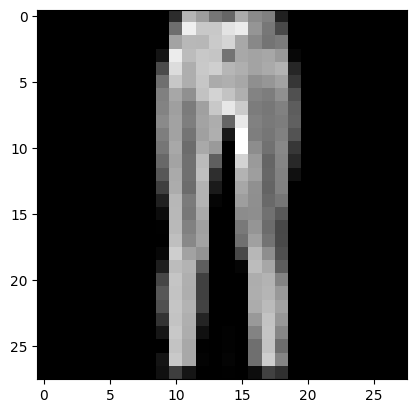

Label: 1


In [45]:
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

In [46]:
#  To do
# 1. Broadcasting
# 2. why you need to squeeze

Further Reading -> https://pytorch.org/docs/stable/data.html